In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

In [2]:
train=pd.read_csv('../data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [4]:
# Identificar duplicados
duplicados = train.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
train.head()

Número de registros duplicados: 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [5]:
# Diccionario de tipos de datos
# Diccionario de tipos de datos
diccionario_tipos = {
    'Id': 'int64',  # Identificador único, numérico.
    'MSSubClass': 'int64',  # Clase del edificio (número entero, representado categóricamente).
    'MSZoning': 'string',  # Clasificación de la zona (categórico).
    'LotFrontage': 'float64',  # Frente del lote en pies (contiene NA, por lo que es float).
    'LotArea': 'int64',  # Área del lote en pies cuadrados.
    'Street': 'string',  # Tipo de calle (categórico).
    'Alley': 'string',  # Tipo de callejón (contiene NA).
    'LotShape': 'string',  # Forma del lote (categórico).
    'LandContour': 'string',  # Contorno del terreno.
    'Utilities': 'string',  # Servicios públicos disponibles.
    'LotConfig': 'string',  # Configuración del lote.
    'LandSlope': 'string',  # Pendiente del terreno.
    'Neighborhood': 'string',  # Vecindario (categórico).
    'Condition1': 'string',  # Proximidad a diversas condiciones (categórico).
    'Condition2': 'string',  # Segunda condición de proximidad.
    'BldgType': 'string',  # Tipo de edificio (categórico).
    'HouseStyle': 'string',  # Estilo de la casa.
    'OverallQual': 'int64',  # Calidad general del material (número entero categórico).
    'OverallCond': 'int64',  # Condición general del edificio (número entero categórico).
    'YearBuilt': 'int64',  # Año de construcción original.
    'YearRemodAdd': 'int64',  # Año de remodelación o adición.
    'RoofStyle': 'string',  # Estilo del techo.
    'RoofMatl': 'string',  # Material del techo.
    'Exterior1st': 'string',  # Revestimiento exterior de la casa.
    'Exterior2nd': 'string',  # Segundo revestimiento exterior.
    'MasVnrType': 'string',  # Tipo de revestimiento de mampostería.
    'MasVnrArea': 'float64',  # Área de revestimiento de mampostería (contiene NA).
    'ExterQual': 'string',  # Calidad del material exterior.
    'ExterCond': 'string',  # Condición del material exterior.
    'Foundation': 'string',  # Tipo de fundación.
    'BsmtQual': 'string',  # Altura del sótano (contiene NA).
    'BsmtCond': 'string',  # Condición general del sótano (contiene NA).
    'BsmtExposure': 'string',  # Exposición del sótano (contiene NA).
    'BsmtFinType1': 'string',  # Calidad del acabado del sótano (contiene NA).
    'BsmtFinSF1': 'float64',  # Área terminada del sótano (puede contener NA).
    'BsmtFinType2': 'string',  # Segundo acabado del sótano (contiene NA).
    'BsmtFinSF2': 'float64',  # Área terminada del sótano (segunda, NA).
    'BsmtUnfSF': 'float64',  # Área no terminada del sótano.
    'TotalBsmtSF': 'float64',  # Área total del sótano.
    'Heating': 'string',  # Tipo de calefacción.
    'HeatingQC': 'string',  # Calidad y condición de la calefacción.
    'CentralAir': 'string',  # Aire acondicionado central (categórico: Y/N).
    'Electrical': 'string',  # Sistema eléctrico (contiene NA).
    '1stFlrSF': 'int64',  # Área del primer piso.
    '2ndFlrSF': 'int64',  # Área del segundo piso.
    'LowQualFinSF': 'int64',  # Área de baja calidad terminada.
    'GrLivArea': 'int64',  # Área habitable por encima del nivel del suelo.
    'BsmtFullBath': 'float64',  # Número de baños completos en el sótano.
    'BsmtHalfBath': 'float64',  # Número de medios baños en el sótano.
    'FullBath': 'int64',  # Número de baños completos por encima del nivel del suelo.
    'HalfBath': 'int64',  # Número de medios baños por encima del nivel del suelo.
    'Bedroom': 'int64',  # Número de dormitorios por encima del nivel del suelo.
    'Kitchen': 'int64',  # Número de cocinas.
    'KitchenQual': 'string',  # Calidad de la cocina.
    'TotRmsAbvGrd': 'int64',  # Total de habitaciones por encima del suelo.
    'Functional': 'string',  # Funcionalidad del hogar.
    'Fireplaces': 'int64',  # Número de chimeneas.
    'FireplaceQu': 'string',  # Calidad de la chimenea (contiene NA).
    'GarageType': 'string',  # Ubicación del garaje (contiene NA).
    'GarageYrBlt': 'float64',  # Año de construcción del garaje (contiene NA).
    'GarageFinish': 'string',  # Interior terminado del garaje.
    'GarageCars': 'float64',  # Tamaño del garaje en capacidad de coches.
    'GarageArea': 'float64',  # Área del garaje en pies cuadrados.
    'GarageQual': 'string',  # Calidad del garaje.
    'GarageCond': 'string',  # Condición del garaje.
    'PavedDrive': 'string',  # Entrada pavimentada (Y/N).
    'WoodDeckSF': 'int64',  # Área de terraza de madera.
    'OpenPorchSF': 'int64',  # Área de porche abierto.
    'EnclosedPorch': 'int64',  # Área de porche cerrado.
    '3SsnPorch': 'int64',  # Área del porche de tres estaciones.
    'ScreenPorch': 'int64',  # Área del porche con pantalla.
    'PoolArea': 'int64',  # Área de la piscina.
    'PoolQC': 'string',  # Calidad de la piscina (NA si no hay piscina).
    'Fence': 'string',  # Calidad de la cerca.
    'MiscFeature': 'string',  # Característica miscelánea.
    'MiscVal': 'int64',  # Valor misceláneo.
    'MoSold': 'int64',  # Mes de venta.
    'YrSold': 'int64',  # Año de venta.
    'SaleType': 'string',  # Tipo de venta.
    'SaleCondition': 'string',  # Condición de venta.
    'SalePrice': 'float64'  # Precio de venta (solo en train.csv).
}
def verificar_y_ajustar_tipos(train, diccionario):
    for columna, tipo_esperado in diccionario.items():
        if columna in train.columns:
            try:
                train[columna] = train[columna].astype(tipo_esperado)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo_esperado}': {e}")

# Aplicar la función a los datasets
verificar_y_ajustar_tipos(train, diccionario_tipos)

# Revisar los tipos después del ajuste
print(train.dtypes)


Id                        int64
MSSubClass                int64
MSZoning         string[python]
LotFrontage             float64
LotArea                   int64
                      ...      
MoSold                    int64
YrSold                    int64
SaleType         string[python]
SaleCondition    string[python]
SalePrice               float64
Length: 81, dtype: object


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,12,2008,WD,Normal,250000.0


### Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

In [7]:
# Lista de columnas categóricas del dataset de House Prices
columnas_categoricas = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# Analizar valores únicos para las columnas categóricas
for columna in columnas_categoricas:
    if columna in train.columns:  # Verificar si la columna está en el DataFrame
        print(f"Valores únicos en '{columna}':")
        print(train[columna].unique())
        print("\n")


Valores únicos en 'MSZoning':
<StringArray>
['RL', 'RM', 'C (all)', 'FV', 'RH']
Length: 5, dtype: string


Valores únicos en 'Street':
<StringArray>
['Pave', 'Grvl']
Length: 2, dtype: string


Valores únicos en 'Alley':
<StringArray>
[<NA>, 'Grvl', 'Pave']
Length: 3, dtype: string


Valores únicos en 'LotShape':
<StringArray>
['Reg', 'IR1', 'IR2', 'IR3']
Length: 4, dtype: string


Valores únicos en 'LandContour':
<StringArray>
['Lvl', 'Bnk', 'Low', 'HLS']
Length: 4, dtype: string


Valores únicos en 'Utilities':
<StringArray>
['AllPub', 'NoSeWa']
Length: 2, dtype: string


Valores únicos en 'LotConfig':
<StringArray>
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Length: 5, dtype: string


Valores únicos en 'LandSlope':
<StringArray>
['Gtl', 'Mod', 'Sev']
Length: 3, dtype: string


Valores únicos en 'Neighborhood':
<StringArray>
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',  'NWAmes',
 'OldTown', 'BrkSide',  'Sawyer', 'NridgHt',   'NAmes', 'SawyerW',  'IDOTRR',
 'Me

In [8]:
# Normalizar valores a minúsculas
train['MSZoning'] = train['MSZoning'].str.lower()
train['Street'] = train['Street'].str.lower()
train['Alley'] = train['Alley'].str.lower()
train['LotShape'] = train['LotShape'].str.lower()
train['LandContour'] = train['LandContour'].str.lower()

# Comprobamos los resultados
print("Valores únicos en 'MSZoning' después de la normalización:")
print(train['MSZoning'].unique())
print("\nValores únicos en 'Street' después de la normalización:")
print(train['Street'].unique())
print("\nValores únicos en 'Alley' después de la normalización:")
print(train['Alley'].unique())
print("\nValores únicos en 'LotShape' después de la normalización:")
print(train['LotShape'].unique())
print("\nValores únicos en 'LandContour' después de la normalización:")
print(train['LandContour'].unique())

Valores únicos en 'MSZoning' después de la normalización:
<StringArray>
['rl', 'rm', 'c (all)', 'fv', 'rh']
Length: 5, dtype: string

Valores únicos en 'Street' después de la normalización:
<StringArray>
['pave', 'grvl']
Length: 2, dtype: string

Valores únicos en 'Alley' después de la normalización:
<StringArray>
[<NA>, 'grvl', 'pave']
Length: 3, dtype: string

Valores únicos en 'LotShape' después de la normalización:
<StringArray>
['reg', 'ir1', 'ir2', 'ir3']
Length: 4, dtype: string

Valores únicos en 'LandContour' después de la normalización:
<StringArray>
['lvl', 'bnk', 'low', 'hls']
Length: 4, dtype: string


### Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

In [9]:
# Unificar los valores en 'MSZoning' train
train['MSZoning'] = train['MSZoning'].str.lower().str.strip()
train['MSZoning'] = train['MSZoning'].replace('c (all)', 'c_all')
print(train['MSZoning'].unique())

<StringArray>
['rl', 'rm', 'c_all', 'fv', 'rh']
Length: 5, dtype: string


### Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [10]:
valores_faltantes = train.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes[valores_faltantes > 0])

Valores faltantes por columna:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Imputación para columnas categóricas
train['Alley'] = train['Alley'].fillna('No Alley')
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('No Basement')
train['BsmtCond'] = train['BsmtCond'].fillna('No Basement')
train['BsmtExposure'] = train['BsmtExposure'].fillna('No Basement')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No Basement')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('No Basement')
train['FireplaceQu'] = train['FireplaceQu'].fillna('No Fireplace')
train['GarageType'] = train['GarageType'].fillna('No Garage')
train['GarageFinish'] = train['GarageFinish'].fillna('No Garage')
train['GarageQual'] = train['GarageQual'].fillna('No Garage')
train['GarageCond'] = train['GarageCond'].fillna('No Garage')
train['PoolQC'] = train['PoolQC'].fillna('No Pool')
train['Fence'] = train['Fence'].fillna('No Fence')
train['MiscFeature'] = train['MiscFeature'].fillna('No MiscFeature')

# Imputación para columnas numéricas
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

# Imputación con la moda para 'Electrical' (solo 1 valor faltante)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

# Verifica si aún quedan valores faltantes
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])



Series([], dtype: int64)


In [14]:
# Verificar que no haya más valores nulos
print("Valores faltantes después de imputar:")
print(train.isnull().sum())

Valores faltantes después de imputar:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


### Graficos

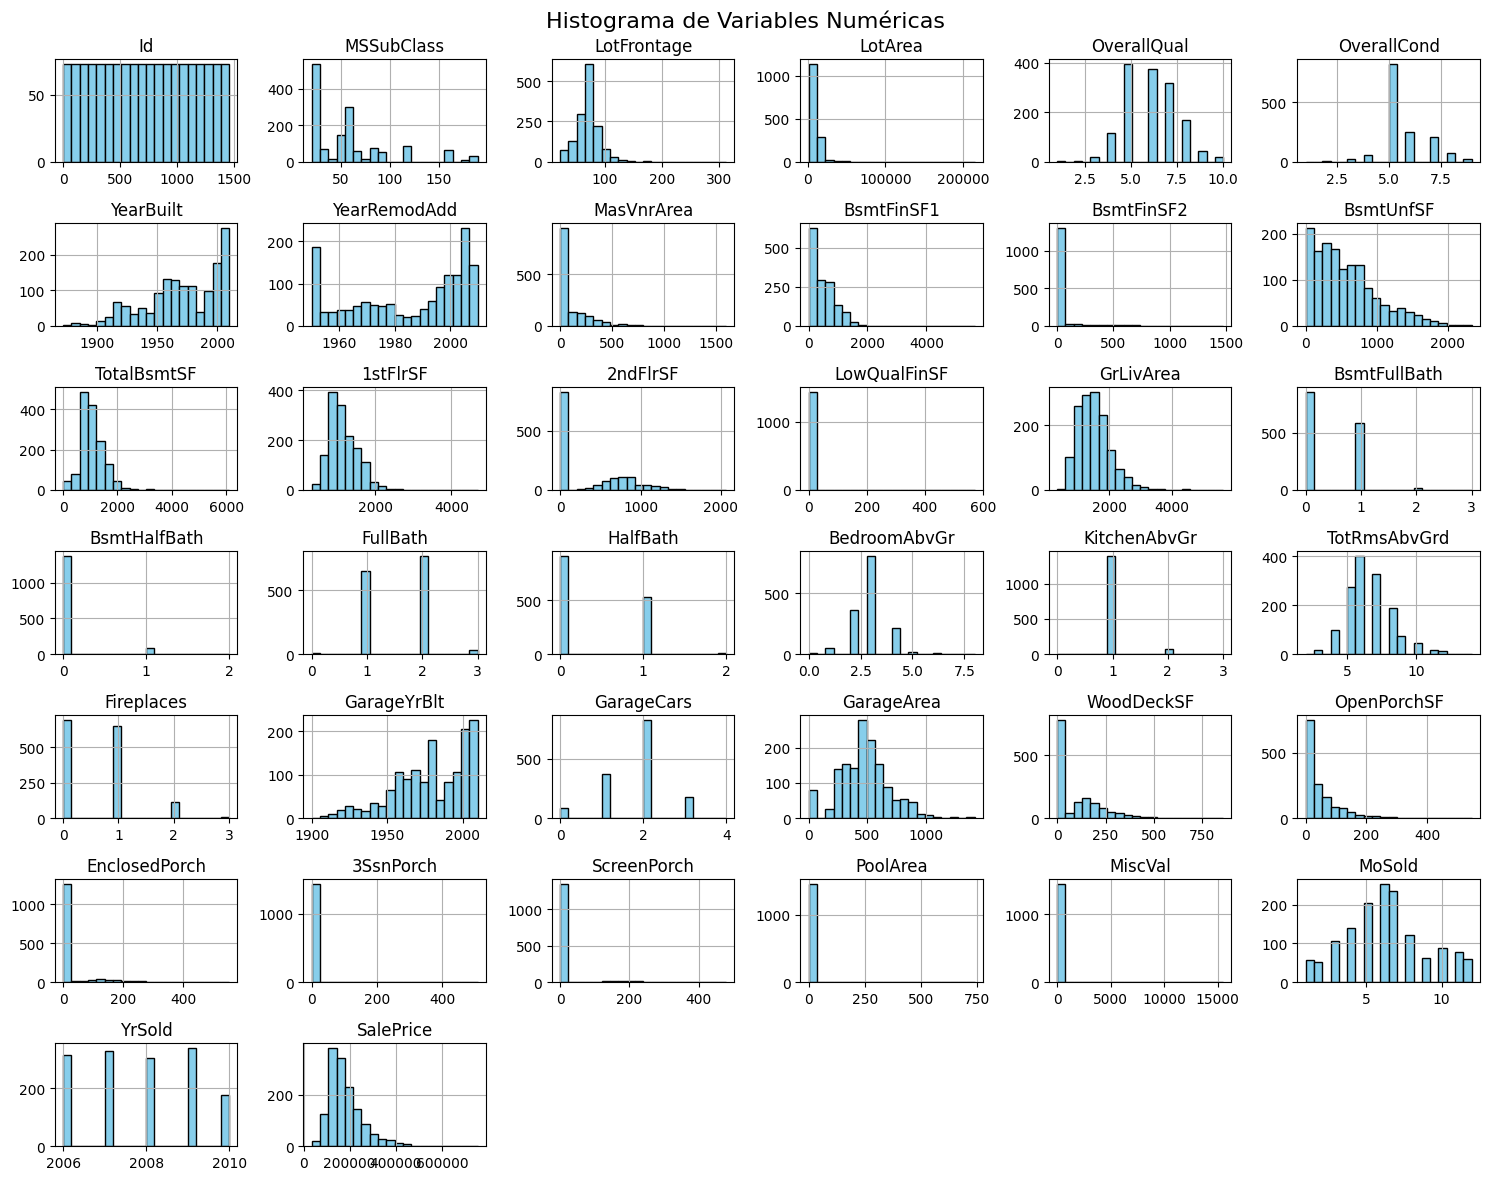

In [15]:
# Histograma para variables numéricas
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
train[numerical_columns].hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Histograma de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22136\2155181823.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='MSZoning', palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22136\2155181823.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Street', palette='viridis')


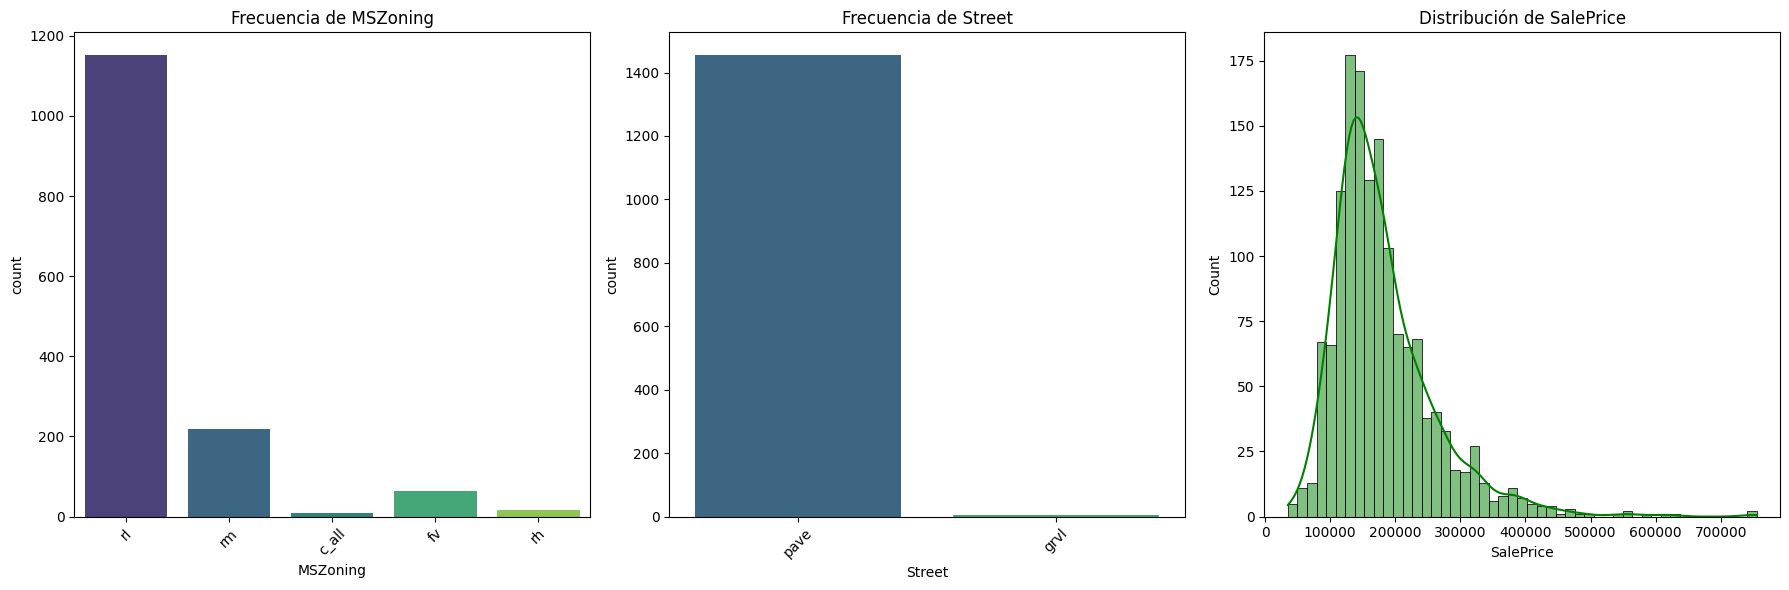

In [28]:

# Selección de tres columnas categóricas importantes
categorical_columns = ['MSZoning', 'Street', 'SalePrice']  # Agregado 'SalePrice'

# Crear una figura con 3 subgráficos en una fila
plt.figure(figsize=(18, 6))

# Primer gráfico (MSZoning)
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer gráfico
sns.countplot(data=train, x='MSZoning', palette='viridis')
plt.title('Frecuencia de MSZoning', fontsize=12)
plt.xticks(rotation=45)

# Segundo gráfico (Street)
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo gráfico
sns.countplot(data=train, x='Street', palette='viridis')
plt.title('Frecuencia de Street', fontsize=12)
plt.xticks(rotation=45)

# Tercer gráfico (SalePrice - Distribución de precios)
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer gráfico
sns.histplot(train['SalePrice'], kde=True, color='green')
plt.title('Distribución de SalePrice', fontsize=12)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


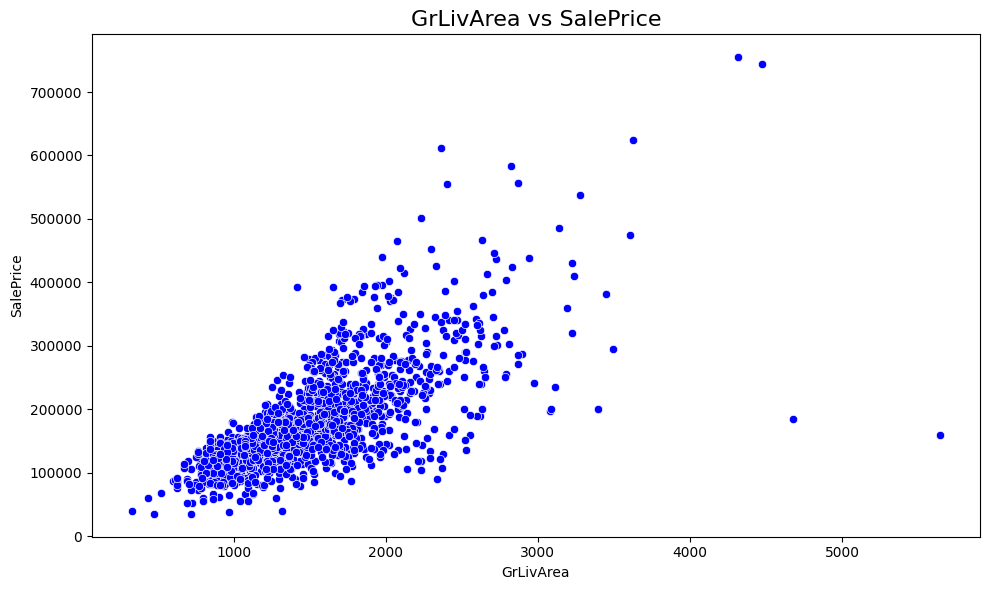

In [29]:
# Diagrama de dispersión entre 'GrLivArea' y 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice', color='blue')
plt.title('GrLivArea vs SalePrice', fontsize=16)
plt.tight_layout()
plt.show()

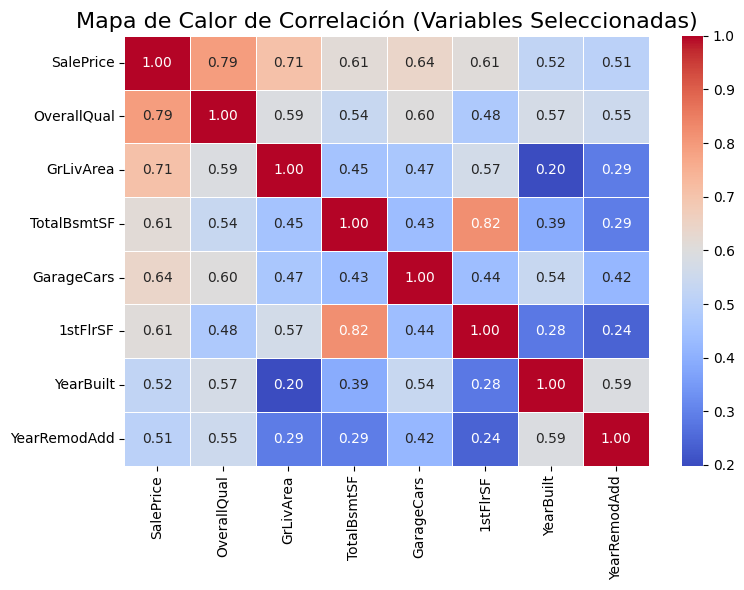

In [ ]:
# Selección de las columnas numéricas más relevantes para correlacionar con SalePrice
selected_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']

correlation_matrix = train[selected_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación (Variables Seleccionadas)', fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
# Estadísticas descriptivas para las variables numéricas
numerical_summary = train[numerical_columns].describe().T
numerical_summary['range'] = numerical_summary['max'] - numerical_summary['min']
numerical_summary['skewness'] = train[numerical_columns].skew()
numerical_summary['kurtosis'] = train[numerical_columns].kurt()

# Mostramos las estadísticas descriptivas
print(numerical_summary)

# Cálculo de la moda
mode_values = train[numerical_columns].mode().iloc[0]
print("\nModa de las columnas numéricas:")
print(mode_values)

                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452  

### Implementación de Modelos:
Modelos de Regresión: Implementa modelos de Linear Regression y LightGBM (LGBM).

Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.

Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [22]:
# Asegurarnos de que los valores categóricos están en formato numérico
categorical_columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
                       'MiscFeature', 'Electrical', 'SaleType', 'SaleCondition']

# Convertir las variables categóricas a números con Label Encoding
le = LabelEncoder()
for col in categorical_columns:
    train[col] = le.fit_transform(train[col].astype(str))

In [23]:
# Selección de características y target
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']


In [24]:
# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Revisión de las columnas categóricas
categorical_columns = X_train.select_dtypes(include=['object']).columns
print(f"Columnas categóricas en X_train: {list(categorical_columns)}")


le = LabelEncoder()
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Verificar nuevamente los tipos de datos
print(X_train.dtypes)


Columnas categóricas en X_train: []
Id                        int64
MSSubClass                int64
MSZoning         string[python]
LotFrontage             float64
LotArea                   int64
                      ...      
MiscVal                   int64
MoSold                    int64
YrSold                    int64
SaleType                  int64
SaleCondition             int64
Length: 80, dtype: object


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinear las columnas de X_train y X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [33]:
# Entrenamiento del modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicción
y_pred_lr = lr_model.predict(X_test)

# Evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")




Linear Regression - MSE: 1276223652.6519, RMSE: 35724.2726, R²: 0.8336


In [ ]:
# Entrenamiento del modelo LightGBM
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Predicción
y_pred_lgb = lgb_model.predict(X_test)

# Evaluación de modelo
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = mse_lgb ** 0.5
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - MSE: {mse_lgb:.4f}, RMSE: {rmse_lgb:.4f}, R²: {r2_lgb:.4f}")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3392
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 100
[LightGBM] [Info] Start training from score 181441.541952
LightGBM - MSE: 820227663.5181, RMSE: 28639.6170, R²: 0.8931


In [36]:
# Comparación de los resultados
print(f"\nComparación de Modelos:")
print(f"Linear Regression - MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"LightGBM - MSE: {mse_lgb:.4f}, RMSE: {rmse_lgb:.4f}, R²: {r2_lgb:.4f}")



Comparación de Modelos:
Linear Regression - MSE: 1276223652.6519, RMSE: 35724.2726, R²: 0.8336
LightGBM - MSE: 820227663.5181, RMSE: 28639.6170, R²: 0.8931
